I previously identified some pretty interesting pieces using geom_spoke with Age, so I'd like to flesh that out a bit more.

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R 
library(tidyverse)
library(cowplot)
library(here)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: here() starts at /workspaces/data_art



In [4]:
%%R -o titanic_data
titanic_data <- read_csv(here("data/titanic.csv"))

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500
2,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833
3,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250
4,1.0,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1000
5,0.0,3.0,Mr. William Henry Allen,male,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
883,0.0,2.0,Rev. Juozas Montvila,male,27.0,0.0,0.0,13.0000
884,1.0,1.0,Miss. Margaret Edith Graham,female,19.0,0.0,0.0,30.0000
885,0.0,3.0,Miss. Catherine Helen Johnston,female,7.0,1.0,2.0,23.4500
886,1.0,1.0,Mr. Karl Howell Behr,male,26.0,0.0,0.0,30.0000


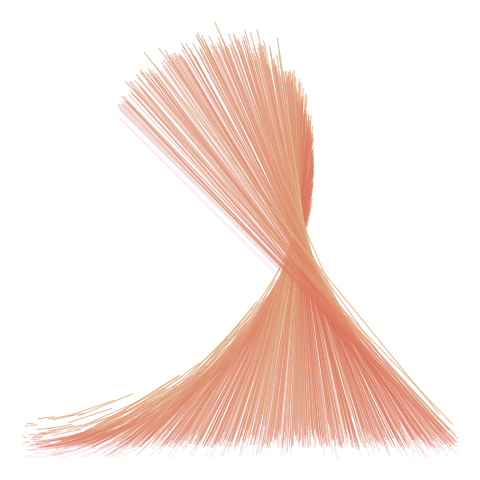

In [17]:
%%R 
bundle <- titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = row,
			col = Age,
			alpha = Age
			),
			
		) +
		scale_colour_gradient(
        	low = "#D85D53", 
        	high = "#DFC08E"
		) +
		theme_nothing()
bundle

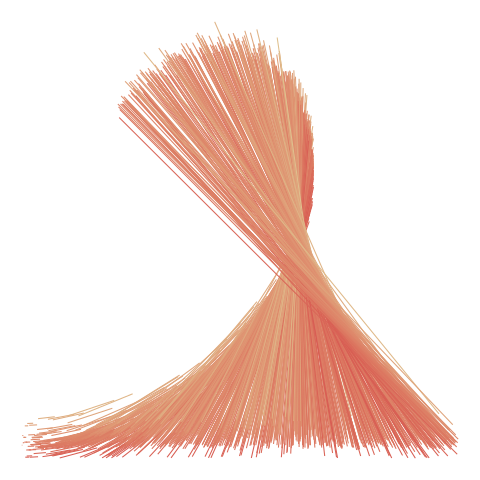

In [18]:
%%R 
bundle <- titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = row,
			col = Age,
			# alpha = Age
			),
			
		) +
		scale_colour_gradient(
        	low = "#D85D53", 
        	high = "#DFC08E"
		) +
		theme_nothing()
bundle

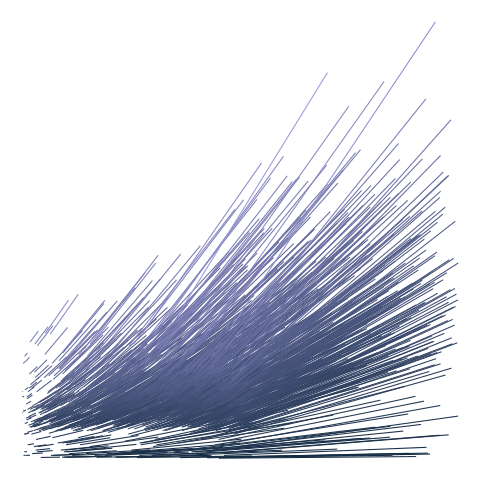

In [19]:
%%R 
fan <- titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			# alpha = Age
			)
		) +
		scale_colour_gradient(
        	high = "#9B97DA"
		) +
		theme_nothing()
fan


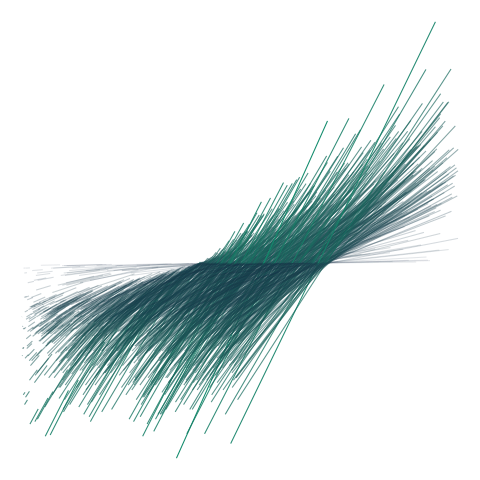

In [15]:
%%R 
wave <- titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age
			) 
		) +
		scale_colour_gradient(
        	high = "#118B6C"
		) +
		theme_nothing()
wave

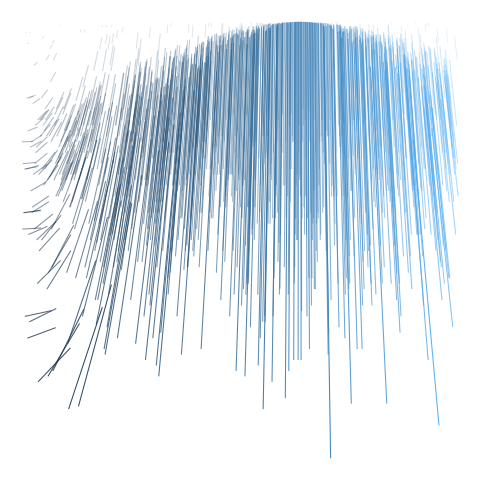

In [22]:
%%R 
waterfall <- titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = Age,
			col = row,
			alpha = Age
			)
		) +
		theme_nothing()
waterfall 

So these are the main 4 forms I've identified. Surely, there may be more, but these are the what I have. I like each of them individually, but I also think they would look nice as a 2x2 grid as I did in galactic window.

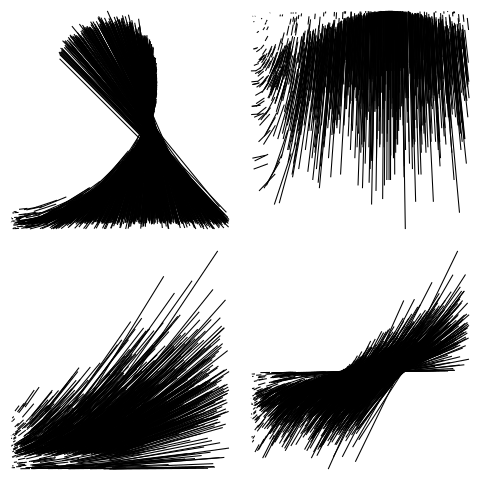

In [17]:
%%R
plot_grid(bundle, waterfall,fan, wave )

I do like them in a grid like this, but perhaps for now I'll focus on presenting them individually.